# Kernel PCA
1. Pick a kernel(polynomial, sigmoid, rbf)
2. Construct the normalized kernel matrix of the data(dimension: m by m)
3. Solve an eigenvalue problem
4. For any data point(new or old), we can represent it as linear combination form

커널 별로 차이가 뚜렷하게 드러나는 데이터를 찾아 KPCA를 적용해보자

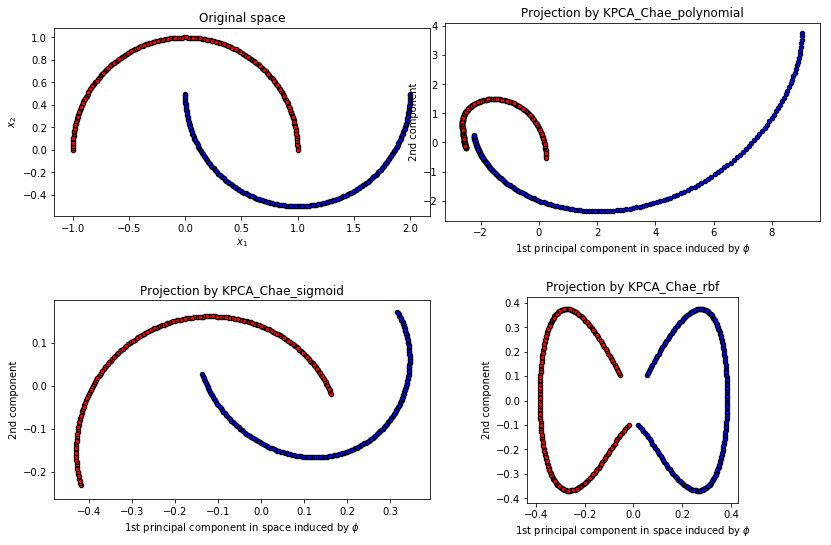

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons


np.random.seed(0)
X, y = make_moons(n_samples=400)

#define kernel matrix
def kernel_matrix(x, kernel=None, d=3, sigma=None, C=1.):
    
    n = x.shape[0]
    if sigma is None:
        sigma = 1./n
    
    xxt = x.dot(x.T)
    if kernel == 'polynomial':
        return (C + xxt)**d
    elif kernel == 'sigmoid':
        return np.tanh(sigma*xxt + C)
    elif kernel == 'rbf':
        A = x.dot(x.T)
        B = np.repeat(np.diag(xxt), n).reshape(n, n)
        return np.exp(-(B.T - 2*A + B)/(2*sigma**2))
    else:
        return xxt


#comparison by kernels
def experiment(K):
    #solve eigenvalue decomposition for centered kernel
    n = K.shape[0]
    one_mat = np.repeat(1/n, n**2).reshape(n, n)
    gram = K - one_mat.dot(K) - K.dot(one_mat) + one_mat.dot(K).dot(one_mat)
    eigen_vals, eigen_vecs = np.linalg.eigh(gram)
    
    eigen_pairs = [(eigen_vals[i], eigen_vecs[:,i]) for i in range(len(eigen_vals))]
    eigen_pairs.sort(key = lambda x: x[0], reverse=True)
    
    #transform data
    n_components = 2
    
    transformed_data = []
    for j in range(n):
        loc = np.zeros(n_components)
        for k in range(n_components):
            inner_prod_sum = 0.
            for i in range(n):
                inner_prod_sum += eigen_pairs[k][1][i] * gram[j,i]
            loc[k] = inner_prod_sum/np.sqrt(eigen_pairs[k][0])
        transformed_data.append(loc)    
        
    return np.array(transformed_data)


results = []
for kernel_type in ['polynomial', 'sigmoid', 'rbf']:
    K = kernel_matrix(X, kernel= kernel_type, sigma=0.2)    
    results.append(experiment(K))

trans_poly = results[0]
trans_sig = results[1]
trans_rbf = results[2]

# Plot kpca results by kernels
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(trans_poly[reds, 0], trans_poly[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(trans_poly[blues, 0], trans_poly[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA_Chae_polynomial")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(trans_sig[reds, 0], trans_sig[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(trans_sig[blues, 0], trans_sig[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA_Chae_sigmoid")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(trans_rbf[reds, 0], trans_rbf[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(trans_rbf[blues, 0], trans_rbf[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA_Chae_rbf")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplots_adjust(0.02, 0.10, 1.35, 0.94, 0.04, 0.35)

plt.show()
